In [2]:
from fastplotlib import Plot, GridPlot
import numpy as np
import random

In [ ]:
# Static Buffer w/ Full Buffer Replacement

## Set grid_plot attributes
grid_shape = (2, 3)

controllers = [
    [0, 3, 1],  
    [2, 2, 3]
]

names = [
    ["subplot0", "subplot1", "subplot2"],
    ["subplot3", "subplot4", "subplot5"]
]

# Create the grid plot
grid_plot = GridPlot(
    shape=grid_shape,
    controllers=controllers,
    names=names
)

image_graphics = list()

# Make a random line for each subplot
for subplot in grid_plot:
    xs = np.linspace(0, 1000, 1000)
    ys = random.sample(range(0,1000), 1000)
    data = np.dstack([xs, ys])[0]
    ig = subplot.add_line(data=data, cmap='jet', name="image")
    image_graphics.append(ig)
    

# Define a function to update the image graphics 
# with new randomly generated data
def set_random_frame():
    for ig in image_graphics:
        ys = random.sample(range(0,1000), 1000)
        new_data = np.dstack([xs, ys])[0]
        ig.data = new_data
# add the animation
grid_plot.add_animations(set_random_frame)
grid_plot.show()

RFBOutputContext()


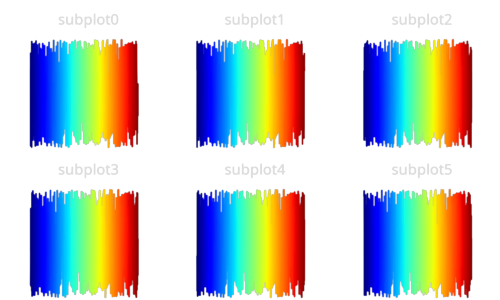

JupyterWgpuCanvas()

In [4]:
# Static Buffer w/ Partial Replacement (Rolling Buffer)
## Simple Indexing

# Set window size
window_length = 10

## Set grid_plot attributes
grid_shape = (2, 3)

controllers = [
    [0, 3, 1],  
    [2, 2, 3]
]

names = [
    ["subplot0", "subplot1", "subplot2"],
    ["subplot3", "subplot4", "subplot5"]
]

# Create the grid plot
grid_plot = GridPlot(
    shape=grid_shape,
    controllers=controllers,
    names=names
)

image_graphics = list()

# Make a random line for each subplot
for subplot in grid_plot:
    xs = np.linspace(0, 1000, 1000)
    
    ys = random.sample(range(0,1000), 1000)
    data = np.dstack([xs, ys])[0]
    ig = subplot.add_line(data=data, cmap='jet', name="image")
    image_graphics.append(ig)

# Define a function to update the image graphics 
# with new randomly generated data
def set_random_frame():
    for ig in image_graphics:
        ys = random.sample(range(0,1000), window_length)
        new_data_points = np.dstack([xs[-window_length:], ys])[0]
        data[:-window_length] = data[window_length:] - [window_length,0]
        data[-window_length:] = new_data_points
        ig.data = data
# add the animation
grid_plot.add_animations(set_random_frame)
grid_plot.show()